## Mode interpretation of the heat equation
Consider the wave equation
\begin{align}
	u_{tt} = c^2u_{xx}, \qquad 0<x<L, \, t>0.
\end{align}

This is subject to Dirichlet boundary conditions, i.e. 
\begin{align}
	u(0,t) &= 0,\\
	u(L,t) &= 0,\\
	u(x,0) &= f(x).
    u_t(x,0) &= 0.
\end{align}

The solution was computed by hand using eigenfunction expansion and reads as
\begin{align}
    u(x,t) &= \sum_{n=1}^\infty f_n \cos\left(\frac{n\pi}{L}ct\right) \sin\left(\frac{n\pi}{L}x\right),\\
    f_n &= \frac{2}{L} \int_0^L f(x) \sin\left(\frac{n\pi}{L}x\right) \, dx
\end{align}

### 1. Initial condition
We assume that the initial condition $f(x)$ consists of two modes, mode 1 and mode 5. 

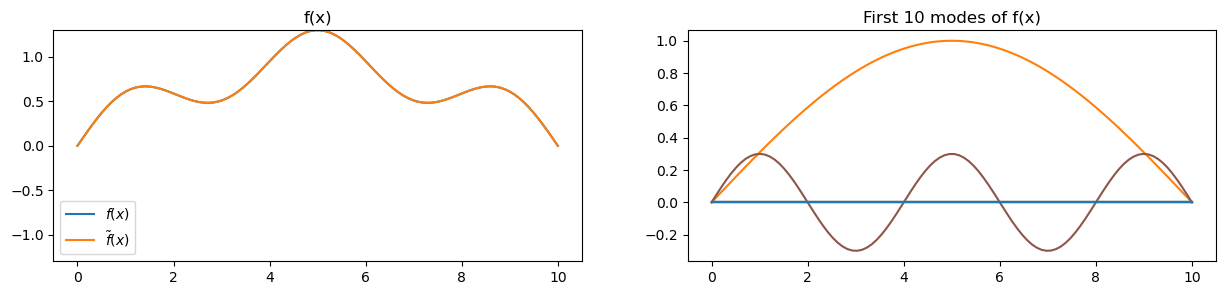

In [25]:
import numpy as np
import matplotlib.pyplot as plt
L = 10
c = 1
T = 2*L/c
xmax = 100
tmax = 49
N = 30
x = np.linspace(0, L, xmax).reshape((xmax, 1, 1))
t = np.linspace(0, T, tmax).reshape((1, tmax, 1))

n = np.arange(0,N).reshape((1,1,N))
modes = np.array((len(x), len(t), N))

phi_n = np.sin(n*np.pi/L*x)
la_n = (n*np.pi/L)**2
fn = np.zeros(N)
fn[1]=1
fn[5]=0.3
fn = fn.reshape((1,1, fn.shape[0]))
f = np.sum(fn*phi_n, axis=-1)[:,0]
a_n = fn*np.cos(c*np.sqrt(la_n)*t)

modes = a_n*phi_n
u = np.sum(modes, axis=-1)

# Figure 1
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.plot(x.flatten(), f, label=r'$f(x)$')
plt.plot(x.flatten(), u[:,0], label=r'$\tilde{f}(x)$')
plt.ylim(-np.max(np.abs(f)), np.max(np.abs(f)))
plt.legend()
plt.title('f(x)')

plt.subplot(1,2,2)
plt.plot(x.flatten(), modes[:, 0, :11])
plt.title('First 10 modes of f(x)')

plt.show()

Lets see the animated solution now

In [ ]:
# Set up figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(u.min(), u.max())
ax.set_xlabel("x")
ax.set_ylabel("u(x,t)")

# Initialization
def init():
    line.set_data([], [])
    return line,

# Update function
def update(frame):
    line.set_data(x, u[:, frame])
    ax.set_title(f"t = {t[frame]:.2f}")
    return line,

# Build animation (no blit for Jupyter reliability)
ani = FuncAnimation(fig, update, frames=len(t), init_func=init,
                    interval=50, blit=False)

# Display animation with controls
HTML(ani.to_jshtml())

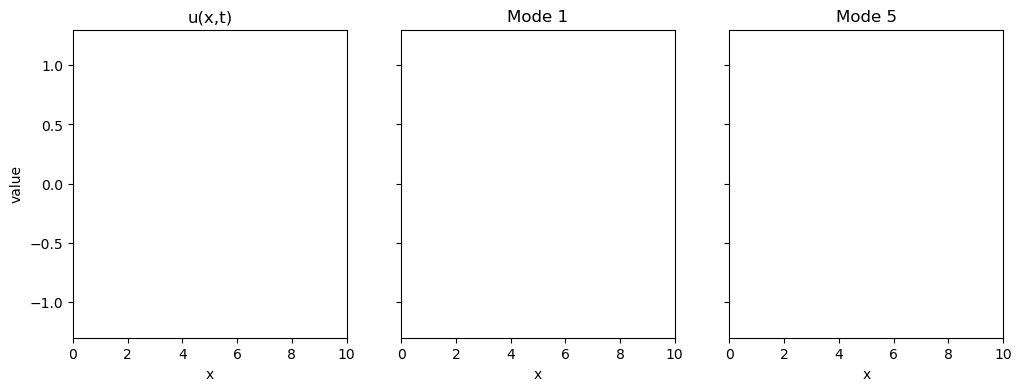

In [32]:
# Set up figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
lines = []
v = modes[:,:,1]
w = modes[:,:,5]
titles = ["u(x,t)", "Mode 1", "Mode 5"]
fields = [u, v, w]

for ax, title in zip(axes, titles):
    line, = ax.plot([], [], lw=2)
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(min(arr.min() for arr in fields),
                max(arr.max() for arr in fields))
    ax.set_xlabel("x")
    ax.set_title(title)
    lines.append(line)

axes[0].set_ylabel("value")

# Initialization
def init():
    for line in lines:
        line.set_data([], [])
    return lines

# Update function
def update(frame):
    for line, field, ax in zip(lines, fields, axes):
        line.set_data(x, field[:, frame])
        
    return lines

# Build animation
ani = FuncAnimation(fig, update, frames=tmax, init_func=init,
                    interval=50, blit=False)

# Show animation
HTML(ani.to_jshtml())